NO 2

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

file_path = '/content/drive/MyDrive/L/UTS.csv'
data = pd.read_csv(file_path)

X = data.drop(columns='price_range')
y = data['price_range']

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_encoded = pd.get_dummies(X_imputed, columns=['n_cores', 'fc', 'pc', 'sc_h', 'sc_w', 'talk_time'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)


Dimensi X_train: (1600, 110)
Dimensi X_test: (400, 110)
Dimensi y_train: (1600,)
Dimensi y_test: (400,)


In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("Jumlah nilai hilang setelah imputasi:\n", X_imputed.isnull().sum())


Jumlah nilai hilang setelah imputasi:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

print("Ringkasan statistik setelah StandarScaler:")
print(X_scaled.describe())


Ringkasan statistik setelah StandarScaler:
       battery_power          blue   clock_speed      dual_sim            fc  \
count   2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   -1.563194e-16 -1.243450e-17 -1.545430e-16  8.082424e-17  5.861978e-17   
std     1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min    -1.680562e+00 -9.900495e-01 -1.253064e+00 -1.019184e+00 -9.928904e-01   
25%    -8.806122e-01 -9.900495e-01 -1.007906e+00 -1.019184e+00 -7.624947e-01   
50%    -1.680370e-02 -9.900495e-01 -2.727384e-02  9.811771e-01 -3.017032e-01   
75%     8.578380e-01  1.010051e+00  8.307794e-01  9.811771e-01  6.198797e-01   
max     1.733620e+00  1.010051e+00  1.811412e+00  9.811771e-01  3.384628e+00   

             four_g    int_memory         m_dep     mobile_wt       n_cores  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   1.048051e-16  5.684342e-17 -1.030287e-16 -3.765876e-16 -7.727152e-17   

In [5]:
print("Statistik deskriptif sebelum imputasi dan standarisasi:")
print(X.describe())

print("\nStatistik deskriptif setelah imputasi:")
print(X_imputed.describe())

print("\nStatistik deskriptif setelah standarisasi:")
print(X_scaled.describe())


Statistik deskriptif sebelum imputasi dan standarisasi:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    1990.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1237.867839     0.4950     1.522250     0.509500     4.309500   
std       439.676025     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       850.250000     0.0000     0.700000     0.000000     1.000000   
50%      1225.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  1990.000000  2000.000000  1990.000000  2000.000000   
mean      0.521500    31.987940     0.501750   140.344221     4.520500   
std       0.499662    18.136427     0.288416    35.4071

NO 3

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [7]:
data = pd.read_csv('/content/drive/MyDrive/L/UTS.csv')

In [14]:

data.dropna(inplace=True)

label_encoder = LabelEncoder()
data['wifi'] = label_encoder.fit_transform(data['wifi'])


In [15]:
X = data.drop('blue', axis=1)
y = data['blue']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [18]:
y_pred = dt_classifier.predict(X_test)


In [19]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriks Kebingungan:")
print(conf_matrix)


Akurasi: 0.53
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52       185
           1       0.56      0.50      0.53       207

    accuracy                           0.53       392
   macro avg       0.53      0.53      0.53       392
weighted avg       0.53      0.53      0.53       392

Matriks Kebingungan:
[[102  83]
 [103 104]]


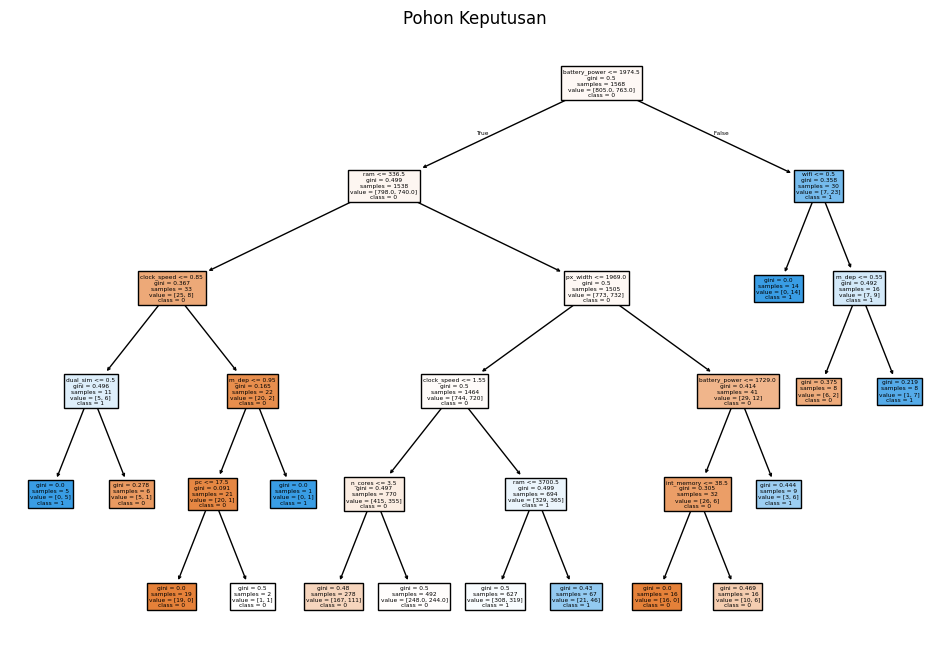

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

class_names = [str(c) for c in label_encoder.classes_]

plt.figure(figsize=(12,8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=class_names) # Use converted class names
plt.title("Pohon Keputusan")
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [23]:

data = pd.read_csv('/content/drive/MyDrive/L/UTS.csv')


In [24]:
X = data.drop('wifi', axis=1)
y = data['wifi']


In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [27]:
print(f"Ukuran data pelatihan: {X_train.shape[0]} contoh")
print(f"Ukuran data pengujian: {X_test.shape[0]} contoh")


Ukuran data pelatihan: 1700 contoh
Ukuran data pengujian: 300 contoh


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


data = pd.read_csv('/content/drive/MyDrive/L/UTS.csv')


X = data.drop('wifi', axis=1)
y = data['wifi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10)


dt_classifier.fit(X_train, y_train)


y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriks Kebingungan:")
print(conf_matrix)


Akurasi: 0.54
Matriks Kebingungan:
[[ 55  85]
 [ 54 106]]


NO 4

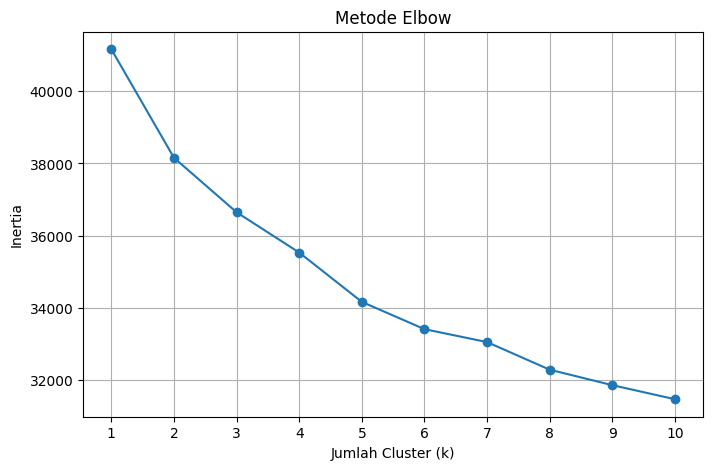

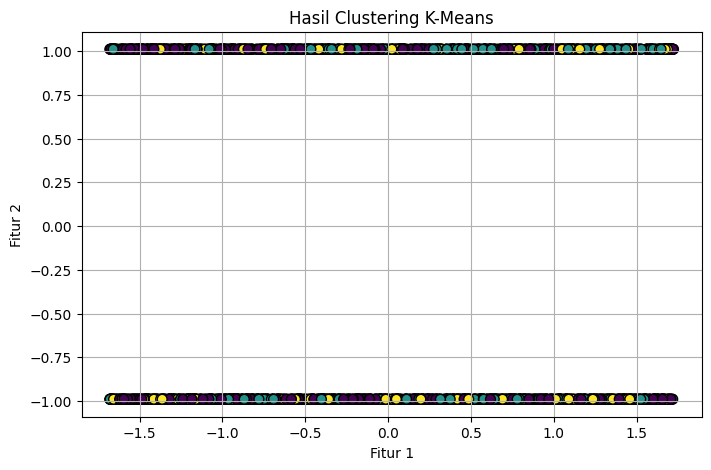

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/MyDrive/L/UTS.csv')

data.dropna(inplace=True)

scaler = StandardScaler()
X = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

data['Cluster'] = clusters

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hasil Clustering K-Means')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.grid()
plt.show()


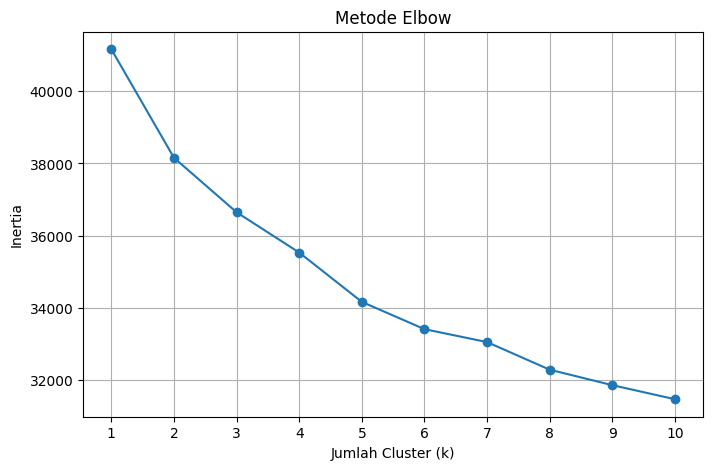

Silhouette Score: 0.06


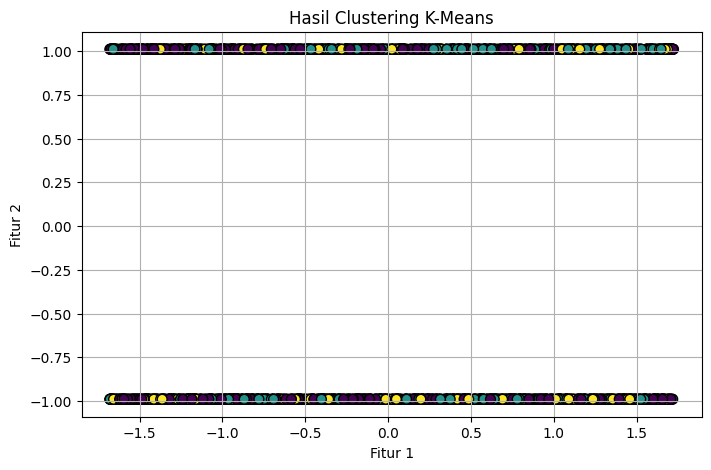

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv('/content/drive/MyDrive/L/UTS.csv')

data.dropna(inplace=True)

scaler = StandardScaler()
X = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

data['Cluster'] = clusters

silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hasil Clustering K-Means')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.grid()
plt.show()
